/var/folders/l6/6sxbgtsx1p31h12wwy8mc1y00000gn/T/ipykernel_59615/805937137.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  rgb_image = imageio.imread('3d_obiect/rgb.png')


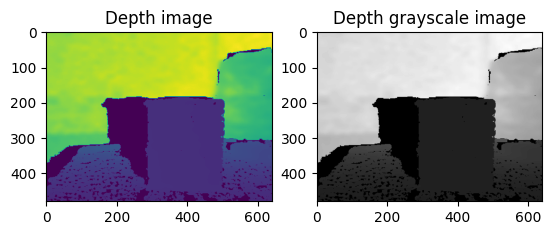

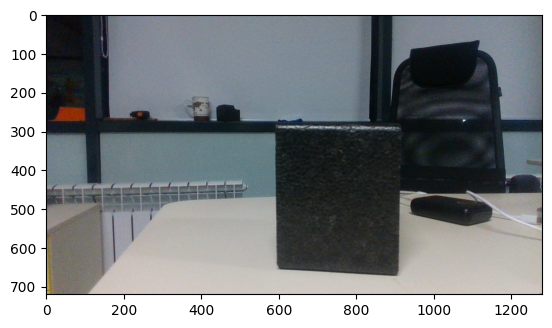

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


In [5]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d
import random
import pyransac3d as pyrsc

# Depth camera calibration
FX_DEPTH = 211.348495
FY_DEPTH = 211.348495
CX_DEPTH = 212.030106
CY_DEPTH = 117.634529

# Read depth image:
depth_image = np.load('3d_obiect/depth_img.npy')
rgb_image = imageio.imread('3d_obiect/rgb.png')
depth_grayscale = np.array(256 * depth_image / 0x0fff, dtype=np.uint8)
depth_grayscale = np.stack((depth_grayscale,) * 3, axis=-1)

height, width = depth_image.shape

# compute indices and reshape it to have the same shape as the depth image:
jj = np.tile(range(width), height).reshape((height, width))
ii = np.repeat(range(height), width).reshape((height, width))
# Compute constants:
xx = (jj - CX_DEPTH) / FX_DEPTH
yy = (ii - CY_DEPTH) / FY_DEPTH
# compute organised point cloud:
organized_pcd = np.dstack((xx * depth_image, yy * depth_image, depth_image))

# Ground_detection:
THRESHOLD = 1365  # Define a threshold
y_max = max(organized_pcd.reshape((height * width, 3)), key=lambda x: x[1])[1]  # Get the max value

# Display depth and grayscale image:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(depth_image)
axs[0].set_title('Depth image')
axs[1].imshow(np.array(256 * depth_image / 0x0fff, dtype=np.uint8), cmap="gray")
axs[1].set_title('Depth grayscale image')
plt.show()

plt.imshow(rgb_image)
plt.show()
pcd = []
height, width = depth_image.shape
for i in range(height):
    for j in range(width):
        z = depth_image[i][j]
        x = (j - CX_DEPTH) * z / FX_DEPTH
        y = (i - CY_DEPTH) * z / FY_DEPTH
        pcd.append([x, y, z])

pcd_o3d = o3d.geometry.PointCloud()  # create point cloud object
pcd_o3d.points = o3d.utility.Vector3dVector(pcd)  # set pcd_np as the point cloud points
# Visualize:
o3d.visualization.draw_geometries([pcd_o3d])